In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
root_path ='gdrive/My Drive/Stocks Internship'

In [ ]:
data = "gdrive/My Drive/Stocks Internship/TSLA.csv"
file1 = open(data, "r")
data= pd.read_csv(file1)
data=pd.DataFrame(data)
print (data)


            Date     Close     Volume      Open      High       Low
0     08/23/2023  236.8600  101077600  229.3400  238.9800  229.2900
1     08/22/2023  233.1900  130597900  240.2500  240.8200  229.5500
2     08/21/2023  231.2800  135702700  221.5512  232.1343  220.5800
3     08/18/2023  215.4900  136276600  214.1200  217.5800  212.3600
4     08/17/2023  219.2200  120718400  226.0600  226.7400  218.8300
...          ...       ...        ...       ...       ...       ...
1251  08/31/2018   20.1107   80505680   20.1333   20.3539   19.9067
1252  08/30/2018   20.2100  108159321   20.1507   20.3067   19.8480
1253  08/29/2018   20.3340  111158014   20.6847   20.7900   20.2460
1254  08/28/2018   20.7907  114591738   21.2273   21.2587   20.7460
1255  08/27/2018   21.2847  195939652   21.2000   21.4957   20.5873

[1256 rows x 6 columns]


In [ ]:
data['Open-Close'] = data['Open'] - data['Close'].shift(1)

data['Moving Avg']=data['Close'].rolling(5).mean()  #adding a moving average
data['Daily Ret']=(data['Close']-data['Open'])/data['Open']*100

print('\nBefore normalizing data:\n',data)
data=data.dropna()
data=data[::-1]

print (data.head(15))
features=['Open','Close','Open-Close','Daily Ret', 'Moving Avg']
X = data[features]

data['Next_Day'] = (data['Close'].shift(-1))
y = data['Next_Day'].values
print (data)

print (len(features))

start_date = '20123-08-01' #5 years of historical data.
prediction_date='2023-10-01'
end_date = '2023-11-20' #Taking one year.
look_back = 60   #Number of past days to consider for LSTM input.


Before normalizing data:
             Date     Close     Volume      Open      High       Low  \
0     08/23/2023  236.8600  101077600  229.3400  238.9800  229.2900   
1     08/22/2023  233.1900  130597900  240.2500  240.8200  229.5500   
2     08/21/2023  231.2800  135702700  221.5512  232.1343  220.5800   
3     08/18/2023  215.4900  136276600  214.1200  217.5800  212.3600   
4     08/17/2023  219.2200  120718400  226.0600  226.7400  218.8300   
...          ...       ...        ...       ...       ...       ...   
1251  08/31/2018   20.1107   80505680   20.1333   20.3539   19.9067   
1252  08/30/2018   20.2100  108159321   20.1507   20.3067   19.8480   
1253  08/29/2018   20.3340  111158014   20.6847   20.7900   20.2460   
1254  08/28/2018   20.7907  114591738   21.2273   21.2587   20.7460   
1255  08/27/2018   21.2847  195939652   21.2000   21.4957   20.5873   

      Open-Close  Moving Avg  Daily Ret  
0            NaN         NaN   3.278974  
1         3.3900         NaN  -2.938

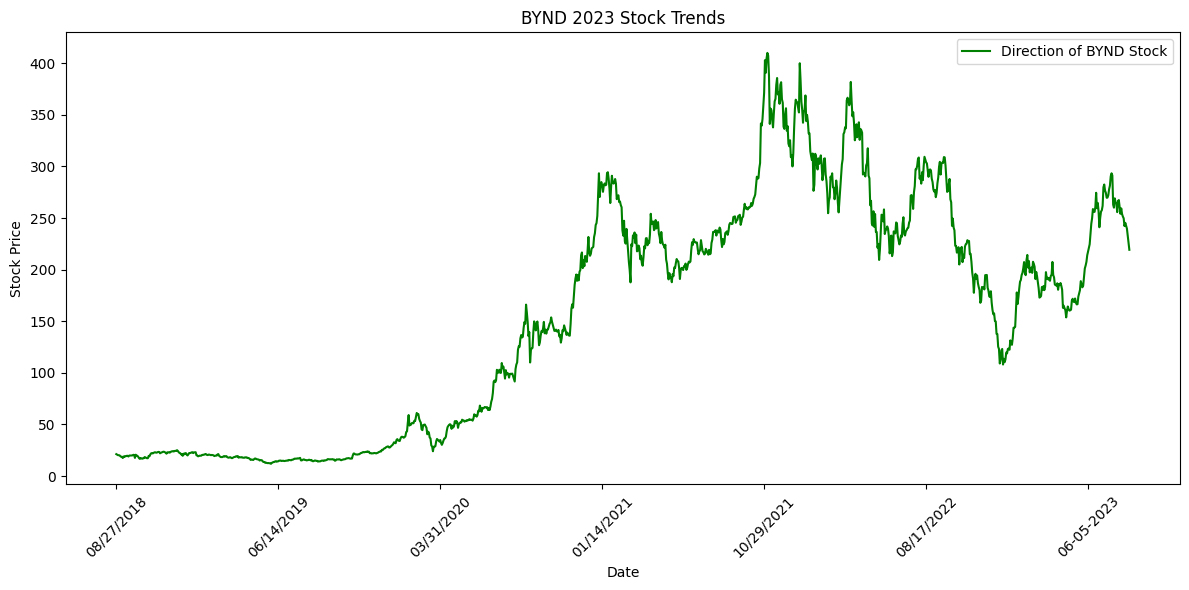

In [ ]:
dates_actual = data['Date']

#The plot.
plt.figure(figsize=(12, 6))
plt.plot(dates_actual, data['Close'], label='Direction of TSLA Stock', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('BYND 2023 Stock Trends')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
plt.tight_layout()
plt.show()


In [ ]:
def dataset_lstm(data,look_back):
  data_x,data_y=[],[]
  dates_list=[]
 #data = data.dropna()
  for i in range(len(data)-look_back):
    dates_list.append(data['Date'][i:i + look_back])
    sequence_x = X[i:i + look_back]
    data_x.append(sequence_x.values)
    data_y.append(y[i + look_back])
  return np.array(data_x),np.array(data_y),dates_list


look_back=60
data_x,data_y,dates_list=dataset_lstm(data,look_back)
print (data_x,'\n', data_y)
print (len(data_x),len(data_y))

[[[ 2.12000000e+01  2.12847000e+01  4.09300000e-01  3.99528302e-01
    2.05460200e+01]
  [ 2.12273000e+01  2.07907000e+01  8.93300000e-01 -2.05678537e+00
    2.01417400e+01]
  [ 2.06847000e+01  2.03340000e+01  4.74700000e-01 -1.69545606e+00
    1.97268000e+01]
  ...
  [ 2.28220000e+01  2.32293000e+01 -7.98700000e-01  1.78468145e+00
    2.32253400e+01]
  [ 2.30127000e+01  2.36207000e+01 -5.52000000e-01  2.64201941e+00
    2.29238800e+01]
  [ 2.37560000e+01  2.35647000e+01  5.90000000e-01 -8.05270248e-01
    2.28130800e+01]]

 [[ 2.12273000e+01  2.07907000e+01  8.93300000e-01 -2.05678537e+00
    2.01417400e+01]
  [ 2.06847000e+01  2.03340000e+01  4.74700000e-01 -1.69545606e+00
    1.97268000e+01]
  [ 2.01507000e+01  2.02100000e+01  4.00000000e-02  2.94282581e-01
    1.94060000e+01]
  ...
  [ 2.30127000e+01  2.36207000e+01 -5.52000000e-01  2.64201941e+00
    2.29238800e+01]
  [ 2.37560000e+01  2.35647000e+01  5.90000000e-01 -8.05270248e-01
    2.28130800e+01]
  [ 2.27833000e+01  2.3166000

In [ ]:
split = int(0.8*len(data))
X_train, X_test, y_train, y_test = data_x[:split], data_x[split:], data_y[:split], data_y[split:]

X_train_flat = X_train.reshape(-1, X_train.shape[-1])
X_test_flat=X_test.reshape(-1,X_test.shape[-1])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_train_scaled = X_train_scaled.reshape(X_train.shape)

X_test_scaled = scaler.transform(X_test_flat)
X_test_scaled=X_test_scaled.reshape(X_test.shape)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
print ((X_train_scaled))
print ((y_train_scaled))
print (len(X_test_scaled))
print (len(y_test_scaled))


[[[0.02285122 0.02349872 0.51081734 0.46164864 0.02081961]
  [0.02291957 0.02225763 0.5164971  0.37567304 0.01978481]
  [0.02156102 0.02111026 0.51158481 0.38832025 0.01872273]
  ...
  [0.02691234 0.02838417 0.49664144 0.5101316  0.02767763]
  [0.02738981 0.0293675  0.49953647 0.54014005 0.02690601]
  [0.02925087 0.02922681 0.51293786 0.41947842 0.0266224 ]]

 [[0.02291957 0.02225763 0.5164971  0.37567304 0.01978481]
  [0.02156102 0.02111026 0.51158481 0.38832025 0.01872273]
  [0.020224   0.02079873 0.5064836  0.45796484 0.01790161]
  ...
  [0.02738981 0.0293675  0.49953647 0.54014005 0.02690601]
  [0.02925087 0.02922681 0.51293786 0.41947842 0.0266224 ]
  [0.02681544 0.02822514 0.50879892 0.50645843 0.02629646]]

 [[0.02156102 0.02111026 0.51158481 0.38832025 0.01872273]
  [0.020224   0.02079873 0.5064836  0.45796484 0.01790161]
  [0.02018044 0.02054926 0.51622367 0.44373537 0.01653953]
  ...
  [0.02925087 0.02922681 0.51293786 0.41947842 0.0266224 ]
  [0.02681544 0.02822514 0.5087989

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

model=Sequential()
model.add(LSTM(units=50,input_shape=(look_back,len(features))))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train_scaled,y_train_scaled,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
32/32 [==============================] - 5s 43ms/step - loss: 0.0131
Epoch 2/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0025
Epoch 3/50
32/32 [==============================] - 1s 42ms/step - loss: 0.0018
Epoch 4/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0014
Epoch 5/50
32/32 [==============================] - 1s 25ms/step - loss: 0.0010
Epoch 6/50
32/32 [==============================] - 1s 25ms/step - loss: 8.0783e-04
Epoch 7/50
32/32 [==============================] - 1s 25ms/step - loss: 6.8885e-04
Epoch 8/50
32/32 [==============================] - 1s 26ms/step - loss: 6.3351e-04
Epoch 9/50
32/32 [==============================] - 1s 26ms/step - loss: 5.5043e-04
Epoch 10/50
32/32 [==============================] - 1s 25ms/step - loss: 4.8843e-04
Epoch 11/50
32/32 [==============================] - 1s 26ms/step - loss: 4.9263e-04
Epoch 12/50
32/32 [==============================] - 1s 26ms/step - loss: 4.6782e-04
Epoch 13/

6/6 [==============================] - 3s 47ms/step


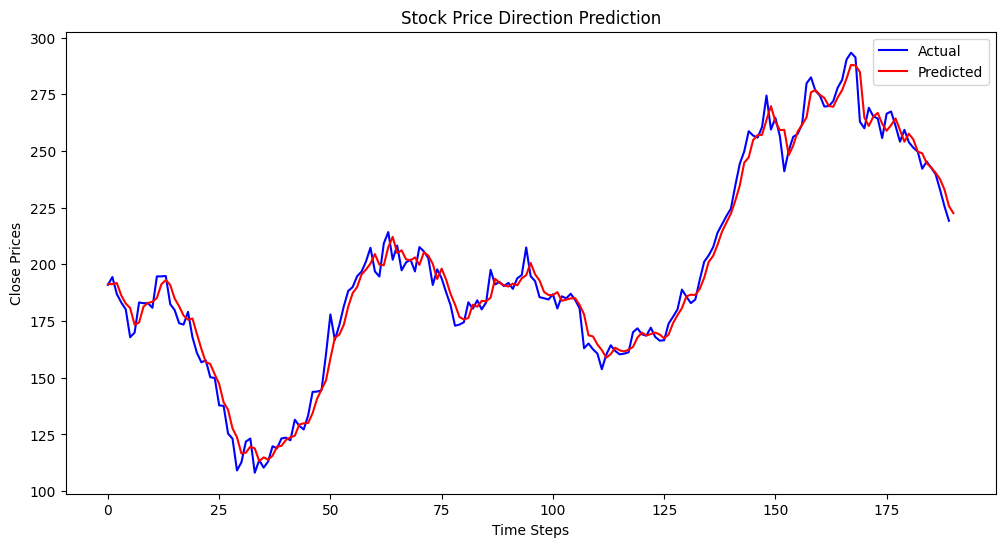

In [ ]:
predictions = model.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions)

# Plot the actual and predicted stock price directions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Stock Price Direction Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Close Prices')
plt.legend()
plt.show()